-----------------------------------------------------------------------------------------------------------
Web-scraping for blend 2020103006z 1hr
Obtained NWP Base URL: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_06z
Obtained NWP Data: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_06z
Obtained NWP Variable and Coordinate Data: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_06z
Plotting contourf
Plotting contour
Plotting fname_can
Plotting fname_usa
Plotting lakes_10m


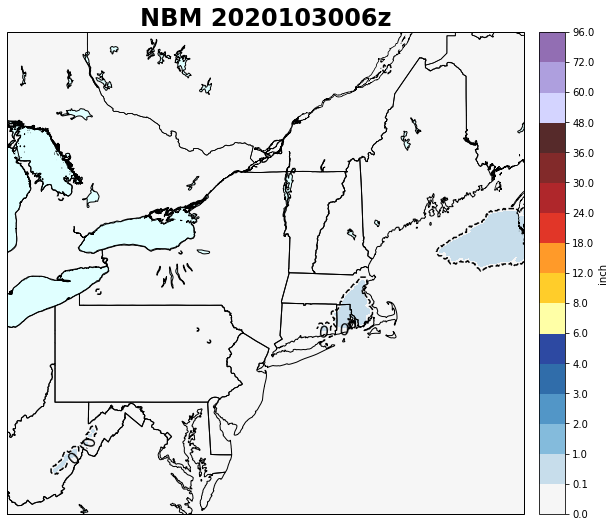

Figure Saved!NBM _2020103006z.png
GHCN-D Stations for Evaluation
Nearest-Nbor Interpolation for NBM  Evaluation
CSV Saved! NBM _2020103006z.csv
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Web-scraping for blend 2020103012z 1hr
Obtained NWP Base URL: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_12z
Obtained NWP Data: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_12z
Obtained NWP Variable and Coordinate Data: http://nomads.ncep.noaa.gov:80/dods/blend/blend20201030/blend_1hr_12z
Plotting contourf
Plotting contour
Plotting fname_can
Plotting fname_usa
Plotting lakes_10m


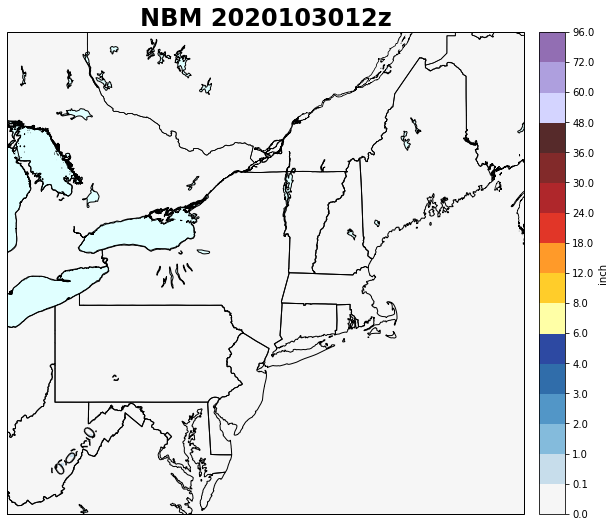

Figure Saved!NBM _2020103012z.png
GHCN-D Stations for Evaluation
Nearest-Nbor Interpolation for NBM  Evaluation
CSV Saved! NBM _2020103012z.csv
-----------------------------------------------------------------------------------------------------------


In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Path, PathPatch
from matplotlib.colors import BoundaryNorm
from cartopy.io.shapereader import Reader
from datetime import datetime, timedelta
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.crs as ccrs
import matplotlib as mpl
import dateutil.parser
import numpy.ma as ma
import pandas as pd
import numpy as np
import time as tm
import netCDF4

###################################################################################################
### STATIC VARIABLES
###################################################################################################
# Cartopy shapefiles
shp_path      = 'C:/Users/Mike/Desktop/Graduate_Work/Evaluation_Procedure/NWP_Domains_shp/Boundaries_Shapefiles/'
fname_usa     = shp_path+'United_States_States_5m/cb_2016_us_state_5m'
fname_can     = shp_path+'Canada_trsmd/canada_tr'
fname_usa_cnt = shp_path+'/cb_2018_us_county_5m/cb_2018_us_county_5m.shp'
fname_neas_cl = shp_path+'/Northeast_Selection/Northeast_Outline.shp'
lakes_10m     = cfeature.NaturalEarthFeature('physical', 'lakes', '10m', edgecolor='face', facecolor='lightcyan')
# Cartopy plot extent
North = 48
South = 37
East  = -66
West  = -82
###################################################################################################
### DEFINE FUNCTIONS
###################################################################################################
# Colorbar function -------------------------------------------------------------------------------
def make_colorbar(ax, mappable, **kwargs):
    divider = make_axes_locatable(ax)
    orientation = kwargs.pop('orientation', 'vertical')
    if orientation == 'vertical':
        loc = 'right'
    elif orientation == 'horizontal':
        loc = 'bottom'
    cax = divider.append_axes(loc, '5%', pad='3%', axes_class=mpl.pyplot.Axes)
    ax.get_figure().colorbar(mappable, cax=cax, orientation=orientation,label="inch", 
                             ticks=[0,0.1,1,2,3,4,6,8,12,18,24,30,36,48,60,72,96])
###################################################################################################
### CREATE COLORBAR
###################################################################################################
# Creating colorbar -------------------------------------------------------------------------------
clevs     = [0,0.1,1,2,3,4,6,8,12,18,24,30,36,48,60,72,96]
cmap_data = [(0.96456693, 0.96456693, 0.96456693),
             (0.77952756, 0.86614173, 0.92125984),
             (0.51574803, 0.73228346, 0.86220472),
             (0.32283465, 0.58661417, 0.77952756),
             (0.18897638, 0.42913386, 0.66535433),
             (0.17716535, 0.28740157, 0.63385827),
             (1.        , 1.        , 0.6496063 ),
             (1.        , 0.80314961, 0.16535433),
             (1.        , 0.6023622 , 0.16141732),
             (0.88188976, 0.21259843, 0.15748031),
             (0.68503937, 0.15354331, 0.16929134),
             (0.50787402, 0.16535433, 0.16535433),
             (0.33858268, 0.16535433, 0.16535433),
             (0.83070866, 0.83070866, 1.        ),
             (0.68110236, 0.62204724, 0.87007874),
             (0.57086614, 0.43307087, 0.7007874 )]
cmap_snow      = mcolors.ListedColormap(cmap_data, 'precipitation')
norm_snow      = mcolors.BoundaryNorm(clevs, cmap_snow.N)
###################################################################################################
### WEB-SCRAPE NBM DATA
###################################################################################################
# NOMADS SERVER -----------------------------------------------------------------------------------
# Which NWP model?
Model      = 1 #0==HRRR,1==NBM
# Available output
ndays      = 0 #0==TODAY,1==YESTERDAY
AO         = ['1hr','3hr','6hr']
AO_SEL_str = AO[0]
# Available times
AT         = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
AT_SEL     = [6,12]
AT_SEL_str = []
for x in range(len(AT_SEL)):
    print("-----------------------------------------------------------------------------------------------------------")
    if AT_SEL[x]>9: AT_SEL_str.append(''+str(AT_SEL[x])+'z')
    else: AT_SEL_str.append('0'+str(AT_SEL[x])+'z')

    # Set the current date [today]
    current_time = datetime(tm.gmtime()[0],tm.gmtime()[1],tm.gmtime()[2])-timedelta(days=ndays)
    time_year    = str(current_time.year)
    time_month   = str(current_time.month)
    time_day     = str(current_time.day)

    # Concentrate month and day if need be
    if len(time_month)== 1: time_month = '0' + time_month
    if len(time_day)== 1: time_day = '0' + time_day
    datestr   = time_year + time_month + time_day
    if Model == 0: 
        Model_str = 'hrrr'
        url       ='http://nomads.ncep.noaa.gov:80/dods/hrrr/hrrr'+datestr+'/hrrr_sfc.t'+AT_SEL_str[x] #HRRR
        title_str = 'HRRR '
    elif Model == 1: 
        Model_str = 'blend'
        url       ='http://nomads.ncep.noaa.gov:80/dods/blend/blend'+datestr+'/blend_'+AO_SEL_str+'_'+AT_SEL_str[x] #NBM
        title_str = 'NBM '
    print("Web-scraping for "+Model_str+" "+datestr+AT_SEL_str[x]+' '+AO_SEL_str)
    # Define the server information using today's date
    #url='http://nomads.ncep.noaa.gov:80/dods/gfs_1p00/gfs' + datestr + '/gfs_1p00_00z' #GFS
    
    print("Obtained NWP Base URL: "+url)
    # Read the NWP file then extract snowfall.
    NC_File        = netCDF4.Dataset(url)
    print("Obtained NWP Data: "+url)
    
    lats           = NC_File.variables['lat'][:]
    lons           = NC_File.variables['lon'][:]
    lons[lons<0]   = 360 + lons[lons<0]
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    if Model == 0:   NWP_SNOW = NC_File.variables['asnowsfc'][-1,:,:]*39.3701   #HRRR m->inch 
    elif Model == 1: NWP_SNOW = NC_File.variables['asnowsfc'][-1,:,:]*0.0393701 #NBM mm->inch
    NC_File.close()
    print("Obtained NWP Variable and Coordinate Data: "+url)
    
    # Plot the figure
    # Plot the figure
    fig   = plt.figure(figsize=(10, 10))
    # Map Resources
    ax    = plt.subplot(1,1,1, projection=ccrs.Mercator())
    ax.set_title(title_str+datestr+AT_SEL_str[x], fontsize=24, fontweight='bold')
    ax.set_extent([West, East, South, North])
    # NBM snowfall shaded contours
    cb = plt.contourf(lon_grid, lat_grid, NWP_SNOW, np.asarray(clevs), 
                      cmap=cmap_snow, norm=norm_snow, vmin = 0.1, vmax = 96, transform=ccrs.PlateCarree(),
                      zorder=1)
    print("Plotting contourf")
    # Contours 
    CS = ax.contour(lon_grid, lat_grid, NWP_SNOW, [12,24,36,48],linestyles='dashed', colors='k',
                        transform=ccrs.PlateCarree(), zorder=4)
    ax.clabel(CS, fontsize=16,inline=True, fmt='%1.0f')
    print("Plotting contour")
    # Additional resources
    ax.add_geometries(Reader(fname_can).geometries(),  ccrs.PlateCarree(), 
                      facecolor="none", edgecolor='black', lw=0.75, zorder=2)
    print("Plotting fname_can")
    ax.add_geometries(Reader(fname_usa).geometries(),  ccrs.PlateCarree(),
                      facecolor="none", edgecolor='black', lw=1.00, zorder=2)
    print("Plotting fname_usa")
    ax.add_feature(lakes_10m, edgecolor='k')
    print("Plotting lakes_10m")
    # Colorbar
    make_colorbar(ax, cb, pad=0)
    plt.show()
    fig.savefig(title_str+"_"+datestr+AT_SEL_str[x]+".png",dpi=300)
    print("Figure Saved!"+title_str+"_"+datestr+AT_SEL_str[x]+".png")
    # Stations for evaluation
    Path_Files = 'C:/Users/Mike/Desktop/Graduate_Work/AirMG_Group/GHCND/2019082018_2019082206/'
    Stations   = pd.read_csv(Path_Files+'Join_LWE.csv')
    Coords_ST  = np.asarray(Stations[['Lon','Lat']])
    Coords_ST[Coords_ST[:,0]<0,0]=Coords_ST[Coords_ST[:,0]<0,0]+360
    WBAN_ST    = np.asarray(Stations[['WBAN']])
    print("GHCN-D Stations for Evaluation")
    # NBM grid for evaluation
    Z_grid_2d    = ma.getdata(NWP_SNOW)
    lon_grid_2d  = ma.getdata(lon_grid)
    lat_grid_2d  = ma.getdata(lat_grid)
    # NBM-Grid extraction for evaluation
    def Nearest_Nbor(lon_grid_2d,lat_grid_2d,query_x,query_y):
        Sub_Coord    = abs(lon_grid_2d-query_x)+abs(lat_grid_2d-query_y)
        x,y          = np.unravel_index(Sub_Coord.argmin(),Sub_Coord.shape)
        return(x,y)
    # NBM evaluation matrix
    Eval_Matrix  = np.empty([len(Coords_ST),6], dtype=object)
    for z in range(len(Eval_Matrix)):
        grid_x,grid_y    = Nearest_Nbor(lon_grid_2d,lat_grid_2d,Coords_ST[z,0],Coords_ST[z,1])
        Eval_Matrix[z,0] = WBAN_ST[z,0]
        Eval_Matrix[z,1] = Coords_ST[z,0]
        Eval_Matrix[z,2] = Coords_ST[z,1]
        Eval_Matrix[z,3] = lon_grid_2d[grid_x,grid_y]
        Eval_Matrix[z,4] = lat_grid_2d[grid_x,grid_y]
        Eval_Matrix[z,5] = round(Z_grid_2d[grid_x,grid_y],1)
    print("Nearest-Nbor Interpolation for "+title_str+" Evaluation")
    # Print to csv
    Eval_Matrix = pd.DataFrame(Eval_Matrix)
    Eval_Matrix.rename(columns={0:'GHCND-ID',1:'Lat',2:'Lon',3:'Grid_Lat',
                                4:'Grid_Lon',5:'Snow_inch'}, inplace=True)
    Eval_Matrix.to_csv(title_str+"_"+datestr+AT_SEL_str[x]+".csv", sep=',',index=False)
    print("CSV Saved! " + title_str + "_"+datestr+AT_SEL_str[x]+".csv")
    print("-----------------------------------------------------------------------------------------------------------")

SNOWFALL
COUNTIES
ATLANTIC
USA STATES
CONTOURS
LAKES
CANADA
NSA_TEST


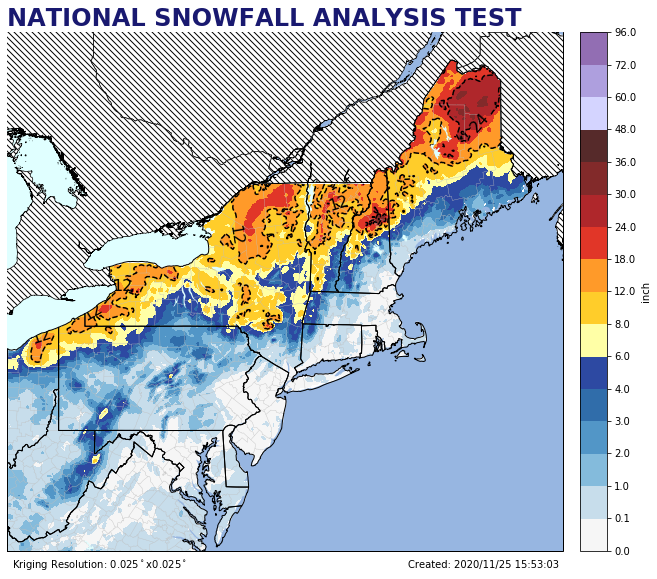

In [11]:
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.patches import Path, PathPatch
    from matplotlib.colors import BoundaryNorm
    from cartopy.io.shapereader import Reader
    from datetime import datetime, timedelta
    import matplotlib.colors as mcolors
    import cartopy.feature as cfeature
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.crs as ccrs
    import matplotlib as mpl
    import dateutil.parser
    import numpy.ma as ma
    import pandas as pd
    import numpy as np
    import time as tm
    import netCDF4

    # Shapefiles for cartopy
    shp_path      = 'C:/Users/Mike/Desktop/Graduate_Work/Evaluation_Procedure/NWP_Domains_shp/Boundaries_Shapefiles/'
    fname_usa     = shp_path+'United_States_States_5m/cb_2016_us_state_5m'
    fname_can     = shp_path+'Canada_trsmd/canada_tr'
    fname_usa_cnt = shp_path+'/cb_2018_us_county_5m/cb_2018_us_county_5m.shp'
    fname_neas_cl = shp_path+'/Northeast_Selection/Northeast_Outline.shp'
    fname_roads   = shp_path+'/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp'

    ocean = cfeature.NaturalEarthFeature(category='physical', name='ocean',
                                         scale='50m',
                                         facecolor=cfeature.COLORS['water'])

    Lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes',
                                         scale='10m',
                                         facecolor='lightcyan')
        
    ###################################################################################################
    ### DEFINE FUNCTIONS
    ###################################################################################################
    # Colorbar function -------------------------------------------------------------------------------
    def make_colorbar(ax, mappable, **kwargs):
        divider = make_axes_locatable(ax)
        orientation = kwargs.pop('orientation', 'vertical')
        if orientation == 'vertical':
            loc = 'right'
        elif orientation == 'horizontal':
            loc = 'bottom'
        cax = divider.append_axes(loc, '5%', pad='3%', axes_class=mpl.pyplot.Axes)
        ax.get_figure().colorbar(mappable, cax=cax, orientation=orientation,label="inch", 
                                 ticks=[0,0.1,1,2,3,4,6,8,12,18,24,30,36,48,60,72,96])
    ###################################################################################################
    ### CREATE COLORBAR
    ###################################################################################################
    # Creating colorbar -------------------------------------------------------------------------------
    clevs     = [0,0.1,1,2,3,4,6,8,12,18,24,30,36,48,60,72,96]
    cmap_data = [(0.96456693, 0.96456693, 0.96456693),
                 (0.77952756, 0.86614173, 0.92125984),
                 (0.51574803, 0.73228346, 0.86220472),
                 (0.32283465, 0.58661417, 0.77952756),
                 (0.18897638, 0.42913386, 0.66535433),
                 (0.17716535, 0.28740157, 0.63385827),
                 (1.        , 1.        , 0.6496063 ),
                 (1.        , 0.80314961, 0.16535433),
                 (1.        , 0.6023622 , 0.16141732),
                 (0.88188976, 0.21259843, 0.15748031),
                 (0.68503937, 0.15354331, 0.16929134),
                 (0.50787402, 0.16535433, 0.16535433),
                 (0.33858268, 0.16535433, 0.16535433),
                 (0.83070866, 0.83070866, 1.        ),
                 (0.68110236, 0.62204724, 0.87007874),
                 (0.57086614, 0.43307087, 0.7007874 )]
    cmap_snow      = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm_snow      = mcolors.BoundaryNorm(clevs, cmap_snow.N)

    West_NE    = -82
    East_NE    = -66
    South_NE   = 37
    North_NE   = 48

    fig = plt.figure(figsize=(10, 8))

    now       = datetime.now()
    GRID      = 'C:/Users/Mike/Desktop/'+'sfav2_CONUS_2019093012_to_2019112512.nc'
    
    NC_File        = netCDF4.Dataset(GRID)
    NSA_SNOW       = NC_File.variables['Data'][:][:]*39.3701
    lats           = NC_File.variables['lat'][:]
    lons           = NC_File.variables['lon'][:]
    NC_File.close()
    lons[lons<0]   = 360 + lons[lons<0]
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    #naming
    test = "NSA_TEST"
    # Map Resources
    ax  = plt.subplot(1,1,1, projection=ccrs.Mercator())
    ax.set_extent([West_NE, East_NE, South_NE, North_NE],crs=ccrs.PlateCarree())
    ax.set_title('NATIONAL SNOWFALL ANALYSIS TEST',
                 fontsize=24,loc='left',fontweight='bold',color="midnightblue")
    #SNOWFALL - SHADED (1)
    cb = plt.contourf(lons, lats, NSA_SNOW, np.asarray(clevs), cmap=cmap_snow, norm=norm_snow,zorder=1,
                      vmin = 0, vmax = 96, alpha=1, transform=ccrs.PlateCarree())
    print("SNOWFALL")
    #USA COUNTIES - POLYGON (2)
    ax.add_geometries(Reader(fname_usa_cnt).geometries(), ccrs.PlateCarree(), facecolor="none",zorder=2,
                      edgecolor='silver', lw=0.25, alpha=0.80)
    print("COUNTIES")
    #ATLANTIC OCEAN - POLYGON (3)
    ax.add_feature(ocean,zorder=5)    #3
    print("ATLANTIC")
    #USA STATES - POLYGON (4)
    ax.add_geometries(Reader(fname_usa).geometries(), ccrs.PlateCarree(),zorder=7, #4
                      facecolor="none", edgecolor='k', lw=1)
    print("USA STATES")
    #SNOW CONTOURS - SEGMENTS (5)
    CS = ax.contour(lons, lats, NSA_SNOW,  [12,24,36,48], linestyles='dashed', colors='k', zorder=3, 
                        transform=ccrs.PlateCarree())
    ax.clabel(CS, fontsize=16, inline=True, fmt='%1.0f') 
    print("CONTOURS")
    #LAKES - POLYGON (6)
    ax.add_feature(Lakes,zorder=4) #5
    print("LAKES")
    #CANADA PROVINCES - POLYGON (7)
    ax.add_geometries(Reader(fname_can).geometries(), ccrs.PlateCarree(), facecolor="w", hatch='\\\\\\\\',
                      edgecolor='black', lw=0.7,zorder=6)
    print("CANADA")
    #COLORBAR
    make_colorbar(ax, cb, pad=0)
    #ADJUST FIGURE
    plt.subplots_adjust(top = 0.95, bottom = 0.05, right = 1, left = 0, hspace = 0, wspace = 0)
    #ADD FIG TEXT
    fig.text(0.09,0.02,'Kriging Resolution: 0.025$^\circ$x0.025$^\circ$', ha='left')
    dt_string = now.strftime("%Y/%m/%d %H:%M:%S")
    fig.text(0.85,0.02,"Created: "+dt_string, ha='right')
    #SAVE FIGURE
    fig.savefig(test,dpi=300)
    print(test)
    #CLOSE FGURE
    #plt.close(fig=None)
    #time.sleep(60*4) # second

In [3]:
NC_File.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  long_name: latitude
                  units: degrees_north
                  standard_name: latitude
                  resolution: 0.04
                  origin_offset: 0.02
                  bounds: lat_bounds
              unlimited dimensions: 
              current shape = (850,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat_bounds', <class 'netCDF4._netCDF4.Variable'>
              float64 lat_bounds(lat, nv)
              unlimited dimensions: 
              current shape = (850, 2)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  long_name: longitude
                  units: degrees_east
                  standard_name: longitude
                  resolution: 0.04
                  origin_offse